датасет сгененрован командами:

``` python extract.py -b 40 -d 2011 2012 2013 -c all -t 5 ```


In [1]:
import pickle
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

from keras.models import Sequential,Model
from keras.layers import Dense, Input, Flatten, Conv2D, MaxPooling2D, Activation

%matplotlib inline

Using TensorFlow backend.


In [2]:
df_train = pd.DataFrame(pd.read_pickle("train40/train.pickle"))
df_test = pd.DataFrame(pd.read_pickle("test40/test.pickle"))

In [3]:
df_train.head()

,features,label
0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
1,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."
3,"[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [4]:
def features_to_matrix(dataset):
    pixs = dataset['features'].apply(pd.Series)
    pixs = pixs.rename(columns = lambda x: 'pix_' + str(x))
    return pixs

In [5]:
x_train = features_to_matrix(df_train[:70000])
x_test = features_to_matrix(df_test)
x_train = pd.concat([x_train, features_to_matrix(df_train[70000:])], axis=0)
x_train.shape

(91301, 1600)

In [6]:
y_test = df_test['label']
y_test = y_test.apply(pd.Series)
y_test = y_test.rename(columns = lambda x: 'class_' + str(x))

In [7]:
y_train = df_train['label']
y_train = y_train.apply(pd.Series)
y_train = y_train.rename(columns = lambda x: 'class_' + str(x))
y_train.shape

(91301, 101)

In [8]:
x_reshaped = x_train.values.reshape((x_train.shape[0], 40, 40, 1))
x_test_reshaped = x_test.values.reshape(x_test.shape[0], 40, 40, 1)

In [9]:
hidden_size = 50
classes_num = y_train.shape[1]
classes_num

101

In [57]:
model = Sequential()
model.add(Conv2D(7, kernel_size=9, input_shape=(40, 40, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))
model.add(Conv2D(30, kernel_size=3))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(classes_num, activation='softmax'))

In [58]:
optimazer = keras.optimizers.Adam(lr=0.0008, beta_1=0.9, beta_2=0.999, amsgrad=False)

In [59]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [60]:
%%time
history = model.fit(x_reshaped, y_train, batch_size=128, validation_split=0.2, epochs=14)

Train on 73040 samples, validate on 18261 samples
Epoch 1/14
73040/73040 [==============================] - 24s 335us/step - loss: 1.0324 - accuracy: 0.7381 - val_loss: 0.4700 - val_accuracy: 0.8697
Epoch 2/14
73040/73040 [==============================] - 24s 335us/step - loss: 0.4995 - accuracy: 0.8602 - val_loss: 0.4003 - val_accuracy: 0.8794
Epoch 3/14
73040/73040 [==============================] - 24s 325us/step - loss: 0.4164 - accuracy: 0.8799 - val_loss: 0.3281 - val_accuracy: 0.9102
Epoch 4/14
73040/73040 [==============================] - 24s 324us/step - loss: 0.3652 - accuracy: 0.8926 - val_loss: 0.2888 - val_accuracy: 0.9169
Epoch 5/14
73040/73040 [==============================] - 24s 324us/step - loss: 0.3265 - accuracy: 0.9016 - val_loss: 0.2606 - val_accuracy: 0.9243
Epoch 6/14
73040/73040 [==============================] - 24s 322us/step - loss: 0.2969 - accuracy: 0.9094 - val_loss: 0.2711 - val_accuracy: 0.9240
Epoch 7/14
73040/73040 [==============================] 

In [61]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

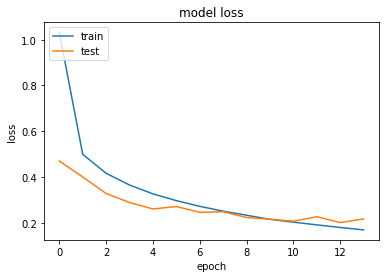

In [62]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

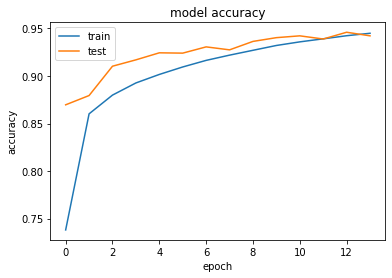

In [63]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [64]:
score, acc = model.evaluate(x_test_reshaped, y_test, batch_size=128)
score, acc

11164/11164 [==============================] - 1s 93us/step


(0.563698336460692, 0.8654603958129883)

In [65]:
model = Sequential()
model.add(Conv2D(7, kernel_size=9, input_shape=(40, 40, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))
model.add(Conv2D(30, kernel_size=3))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(classes_num, activation='softmax'))

In [66]:
optimazer = keras.optimizers.Adam(lr=0.0008, beta_1=0.9, beta_2=0.999, amsgrad=False)

In [67]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [68]:
history = model.fit(x_reshaped, y_train, batch_size=128, epochs=14)

Epoch 1/14
91301/91301 [==============================] - 28s 306us/step - loss: 0.9039 - accuracy: 0.7685
Epoch 2/14
91301/91301 [==============================] - 34s 374us/step - loss: 0.4198 - accuracy: 0.8805
Epoch 3/14
91301/91301 [==============================] - 32s 355us/step - loss: 0.3446 - accuracy: 0.8986
Epoch 4/14
91301/91301 [==============================] - 29s 315us/step - loss: 0.3014 - accuracy: 0.9099
Epoch 5/14
91301/91301 [==============================] - 35s 383us/step - loss: 0.2700 - accuracy: 0.9184
Epoch 6/14
91301/91301 [==============================] - 35s 380us/step - loss: 0.2458 - accuracy: 0.9248
Epoch 7/14
91301/91301 [==============================] - 35s 380us/step - loss: 0.2245 - accuracy: 0.9301
Epoch 8/14
91301/91301 [==============================] - 34s 369us/step - loss: 0.2086 - accuracy: 0.9343
Epoch 9/14
91301/91301 [==============================] - 28s 305us/step - loss: 0.1932 - accuracy: 0.9381
Epoch 10/14
91301/91301 [============

In [69]:
score, acc = model.evaluate(x_test_reshaped, y_test, batch_size=128)
score, acc

11164/11164 [==============================] - 1s 92us/step


(0.5673573176543032, 0.87226802110672)

In [70]:
import pickle

with open('model40.obj', 'wb') as f:
    pickle.dump(model, f)

In [72]:
with open('model40.obj', 'rb') as f:
    saved_model = pickle.load(f)
    score, acc = model.evaluate(x_test_reshaped, y_test, batch_size=128)
score, acc

11164/11164 [==============================] - 1s 95us/step


(0.5673573176543032, 0.87226802110672)